In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/accent-mfcc-data-1.csv')

In [6]:
df_copy=df.copy()

In [7]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [8]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'X11'}>,
        <Axes: title={'center': 'X12'}>]], dtype=object)

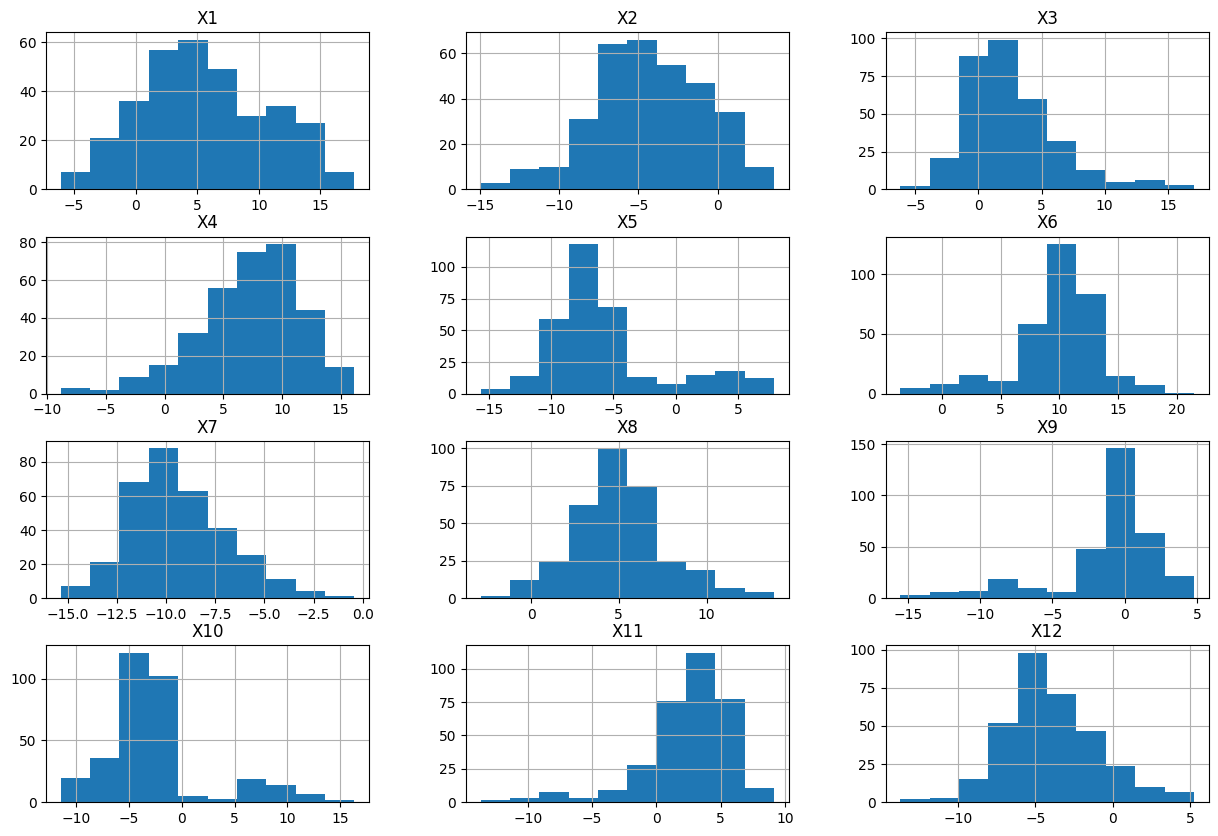

In [10]:
df.hist(figsize=(15,10)) #outliers no outliers

In [11]:
#missing data
print(df.isnull().sum()) # no missing values

language    0
X1          0
X2          0
X3          0
X4          0
X5          0
X6          0
X7          0
X8          0
X9          0
X10         0
X11         0
X12         0
dtype: int64


In [12]:
#NORMALIZATION

from sklearn import preprocessing
import numpy as np

a= np.random.random((1,4))
a=a*20
print("data=",a)

#normilize the data attributes
normalized= preprocessing.normalize(a)
print("Normalized data=", normalized)



data= [[ 1.75716135 11.43644836 18.12183281 18.91578775]]
Normalized data= [[0.06135945 0.39935672 0.63280797 0.66053259]]


In [13]:
# transformation
df['language'].value_counts()

US    165
UK     45
FR     30
GE     30
IT     30
ES     29
Name: language, dtype: int64

In [14]:
y= df['language']

In [15]:
# Encode the accent labels into numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [16]:
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


<ipython-input-17-86afe4c0c15f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='YlGnBu', square=True, linewidth=.5,annot=True)


<Axes: >

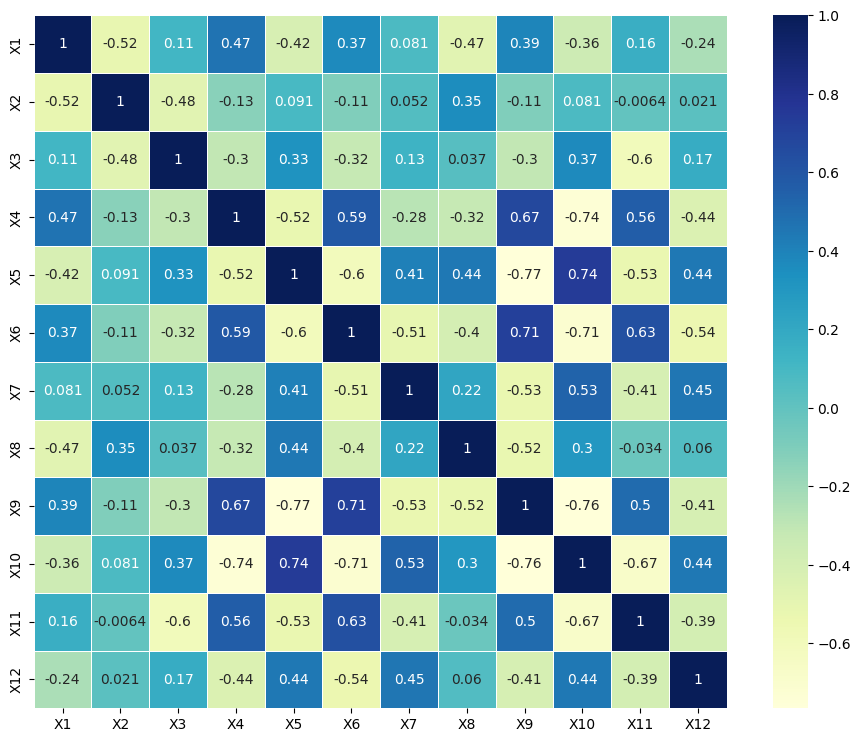

In [17]:
#feature corelation
x,y = plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),cmap='YlGnBu', square=True, linewidth=.5,annot=True)

In [18]:
# training and testing
feature_cols=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12']
#feature_inst=['language_ES','language_FR','language_GE','language_IT','language_UK','language_US']
x=df[feature_cols]
#y=df[feature_inst]

In [19]:
x_train,x_test,y_train, y_test= train_test_split(x,y_encoded, test_size=0.1, random_state=1)

In [20]:
#Decision tree
clf= DecisionTreeClassifier(criterion="entropy",random_state=0)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [21]:
#Accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 60.60606060606061


In [22]:
y_pred

array([1, 5, 5, 5, 3, 3, 1, 5, 5, 5, 4, 5, 5, 5, 3, 3, 5, 0, 4, 5, 5, 4,
       5, 0, 0, 4, 5, 2, 5, 5, 3, 2, 3])

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[ 2  0  0  0  1  1]
 [ 0  1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  1  3  0  1]
 [ 0  0  0  2  1  2]
 [ 1  1  0  1  2 12]]


In [25]:
n_classes=6

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [27]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

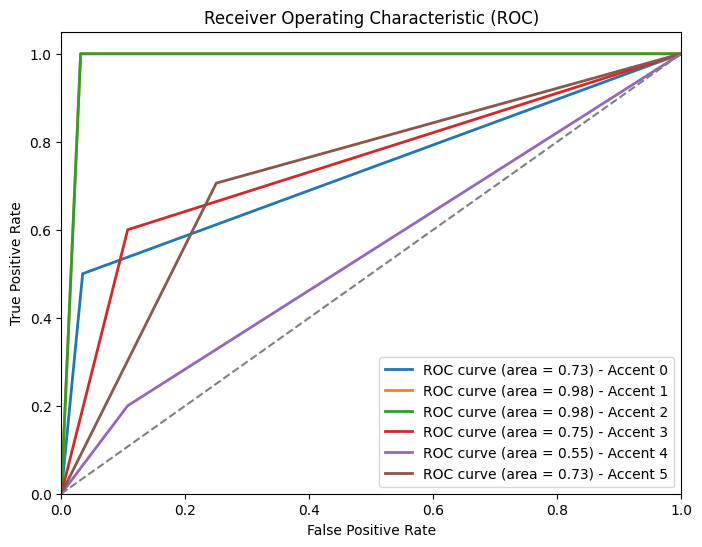

In [28]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Accent %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [37]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred)*100)

Accuracy: 84.84848484848484


In [38]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

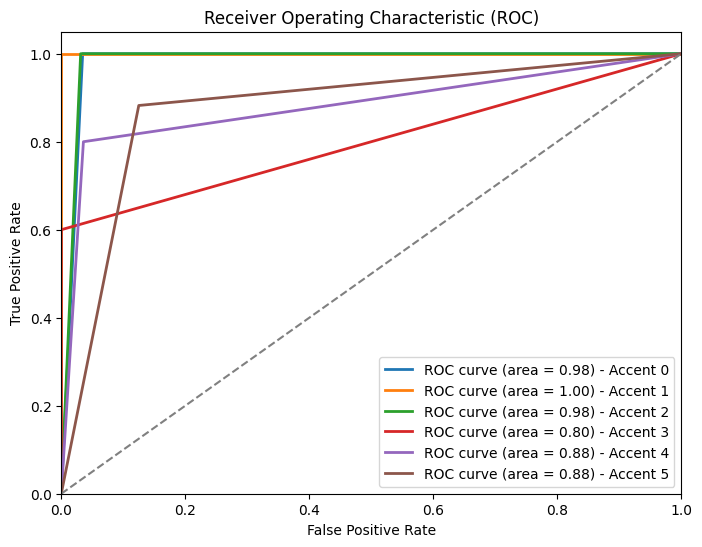

In [39]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Accent %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [32]:
cm = confusion_matrix(y_test, y_pred)
print("confusion matrix:")
print(cm)

confusion matrix:
[[ 4  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  3  1  1]
 [ 0  0  0  0  4  1]
 [ 1  0  1  0  0 15]]


In [33]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=150, max_depth=12,min_samples_leaf=2, min_samples_split=2, max_leaf_nodes=75)

rf= model.fit(x_train,y_train)
print('r_sq%.2f'%rf.score(x_train, y_train))

y_pred=rf.predict(x_train)

r_sq0.91


In [41]:
from sklearn.ensemble import  BaggingRegressor, ExtraTreesRegressor, RandomForestRegressor,StackingRegressor

In [47]:

# define the decision tree model
model = ExtraTreesRegressor()

#fit the model
model.fit(x_train, y_train)

#predictions on the test set
y_pred = model.predict(x_test)


In [48]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred==i)
    roc_auc[i] = auc(fpr[i], tpr[i])

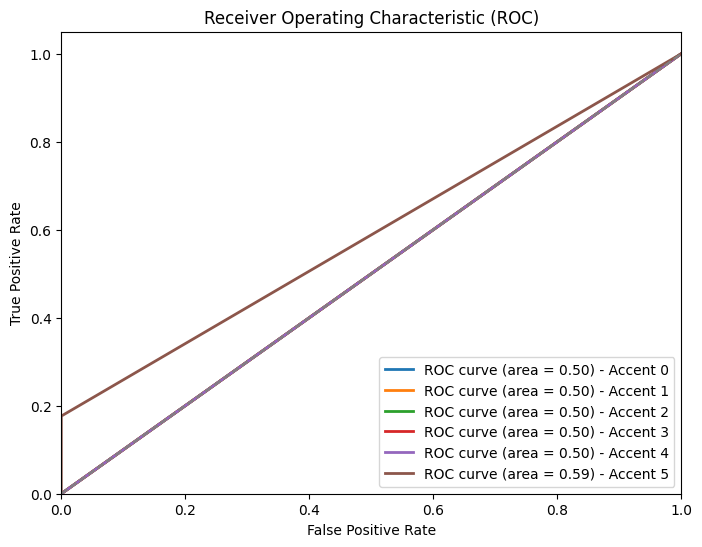

In [49]:
# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(6):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (area = %0.2f) - Accent %d' % (roc_auc[i], i))

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()